In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#list_of_tickers = ["ACB", "GWPH", "CRON", "CGC", "TLRY", "APHA"]
# Set start and end datetimes of 1 year, between now and 365 days ago.
#end_date = datetime.now()
#start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for "SPY" and "AGG"
#df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
#df.head()

ACB                          GWPH                          \
           open high low close volume    open    high     low   close   
date                                                                    
2018-09-21  NaN  NaN NaN   NaN    NaN  170.01  172.50  163.00  164.98   
2018-09-24  NaN  NaN NaN   NaN    NaN  164.16  169.50  162.09  166.52   
2018-09-25  NaN  NaN NaN   NaN    NaN  167.56  173.66  166.64  170.00   
2018-09-26  NaN  NaN NaN   NaN    NaN  170.00  172.40  161.60  163.12   
2018-09-27  NaN  NaN NaN   NaN    NaN  169.18  179.65  167.00  174.50   

                     ...    TLRY                                     APHA  \
             volume  ...    open    high     low   close    volume   open   
date                 ...                                                    
2018-09-21   975812  ...  148.87  148.88  121.51  123.00  16097705  15.13   
2018-09-24   523537  ...  100.98  121.79   97.12   99.50  12388846  15.00   
2018-09-25   634433  ...  119.00  119.40  105.09  107.88   8922359  15.70   
2018-09-26   631769  ...  114.00  118.98  108.77  114.50   6793639  14.99   
2018-09-27  2308152  ...  116.09  137.69  115.33  131.30  12958466  14.46   

                                          
             high    low  close   volume  
date                                      
2018-09-21  15.40  14.35  15.31  1646443  
2018-09-24  15.80  14.74  15.40  1255769  
2018-09-25  15.90  14.95  15.08  1487460  
2018-09-26  15.83  14.49  14.63  1358309  
2018-09-27  14.85  13.42  13.64  2168900  

[5 rows x 30 columns]

In [32]:
# df.to_csv("df_ACB.csv")

In [33]:
df_ACB_csv = pd.read_csv("df_ACB.csv")
df_ACB_csv.head()

,Unnamed: 0,ACB,GWPH,CRON,CGC,TLRY,APHA
0,NaN,close,close,close,close,close,close
1,date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-21,NaN,164.98,12.51,49.78,123.0,15.31
3,2018-09-24,NaN,166.52,11.86,52.5,99.5,15.4
4,2018-09-25,NaN,170.0,11.47,52.74,107.88,15.08


In [19]:
## Cleaning the Data
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,ACB,GWPH,CRON,CGC,TLRY,APHA
,close,close,close,close,close,close
date,,,,,,
2018-09-21,NaN,164.98,12.51,49.78,123.00,15.31
2018-09-24,NaN,166.52,11.86,52.50,99.50,15.40
2018-09-25,NaN,170.00,11.47,52.74,107.88,15.08
2018-09-26,NaN,163.12,11.13,51.98,114.50,14.63
2018-09-27,NaN,174.50,10.94,49.42,131.30,13.64


In [20]:
df.dtypes

ACB   close    float64
GWPH  close    float64
CRON  close    float64
CGC   close    float64
TLRY  close    float64
APHA  close    float64
dtype: object

In [21]:
# Calculating the daily return 
daily_returns = df.pct_change()
daily_returns.head()

,ACB,GWPH,CRON,CGC,TLRY,APHA
,close,close,close,close,close,close
date,,,,,,
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,0.009334,-0.051958,0.054640,-0.191057,0.005879
2018-09-25,NaN,0.020898,-0.032884,0.004571,0.084221,-0.020779
2018-09-26,NaN,-0.040471,-0.029643,-0.014410,0.061364,-0.029841
2018-09-27,NaN,0.069765,-0.017071,-0.049250,0.146725,-0.067669


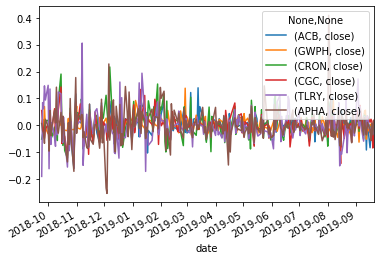

In [22]:
daily_returns.plot()

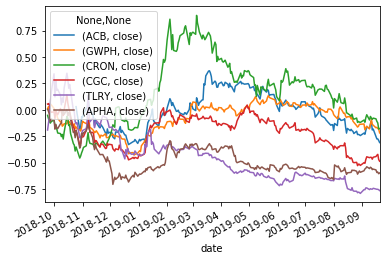

In [23]:
cumulative_returns = (1+ daily_returns).cumprod()-1
cumulative_returns.plot()

In [24]:
# Calculte volatility (standard deviation)

In [25]:
avg_daily_return_ACB= daily_returns.mean()['ACB']['close']
avg_daily_return_GWPH = daily_returns.mean()['GWPH']['close']

# Use the `std` function to calculate the standard deviation of daily returns for `SPY` and `AGG`, respectively
std_dev_daily_return_ACB = daily_returns.std()['ACB']['close']
std_dev_daily_return_GWPH = daily_returns.std()['GWPH']['close']
std_dev_daily_return_ACB

0.041425318832528195

In [11]:
# Monte Carlo Simulation

In [26]:
acb_last_price = df['ACB']['close'][-1]
gwph_last_price = df['GWPH']['close'][-1]

In [27]:
## Set Up Montecarlo Parameters
number_simulations = 100
number_records = 252 * 3

In [28]:
### Initialize DataFrame to hold simulated prices
monte_carlo_price = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

### Run the simulation of projecting stock prices
for x in range(number_simulations):
    # Simulate prices with the last day close for each action
    simulated_ACB_prices = [acb_last_price]
    simulated_GWPH_prices = [gwph_last_price]
    
    # Simulate the returns for 252 * 3 days
    for i in range(number_records):
        # calculate the simulated price using the last price
        simulated_ACB_price = simulated_ACB_prices[-1] * (1 + np.random.normal(avg_daily_return_ACB, std_dev_daily_return_ACB))
        simulated_GWPH_price = simulated_GWPH_prices[-1] * (1 + np.random.normal(avg_daily_return_GWPH, std_dev_daily_return_GWPH))
        # Append simulated prices of each simulation to DataFrame
        simulated_ACB_prices.append(simulated_ACB_price)
        simulated_GWPH_prices.append(simulated_GWPH_price)
    # Append simulated prices of each simulation to DataFrame
    monte_carlo_price["ACB prices"] = pd.Series(simulated_ACB_prices)
    monte_carlo_price["GWPH prices"] = pd.Series(simulated_GWPH_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo_price.pct_change()
    
    # Portfolio weights (60% ACB; 40% GWPH)
    weights = [0.6, 0.4]
    # Use 'dot' function with the weights to calculate portfolio daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1+ portfolio_daily_returns.fillna(0)).cumprod()
    
### Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991862,0.984133,0.974291,1.021219,1.021742,0.970512,1.011058,1.024339,0.982068,0.996426,...,0.987356,0.958251,1.007770,1.010712,1.036812,1.025317,0.944232,1.028874,1.031852,1.017268
2,1.001741,1.060542,0.941331,1.026019,1.031558,0.988728,0.987755,1.041319,0.982665,0.979507,...,1.017686,0.925652,1.059373,1.018721,1.028054,1.001325,0.914229,1.028982,1.044668,1.010593
3,0.959669,1.055269,0.909911,0.986624,1.019652,1.009786,1.019026,1.006719,0.960375,1.031072,...,1.008776,0.930684,1.043822,1.039091,0.985849,1.036799,0.897776,1.006468,1.036858,1.003529
4,0.940625,1.066366,0.869332,0.942239,1.033296,0.984237,0.984858,1.021076,0.944613,1.073443,...,1.001409,0.946826,1.088954,1.047743,0.939143,1.054089,0.858753,1.009663,1.007846,0.976001


In [15]:
# Visualize the Simulation

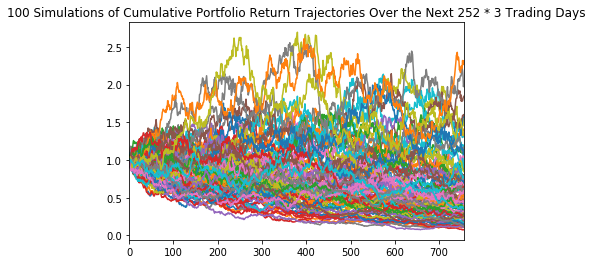

In [29]:
#### `Plot` function to plot `100` simulations of the potential trajectories of the portfolio based on 252 * 3 trading days
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 * 3 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)